# Intelligent Agents: Reflex-Based Agents for the Vacuum-cleaner World

Student Name: [Add your name]

I have used the following AI tools: [list tools]

I understand that my submission needs to be my own work: [your initials]

## Learning Outcomes

* Design and build a simulation environment that models sensor inputs, actuator effects, and performance measurement.
* Apply core AI concepts by implementing the agent function for a simple and model-based reflex agents that respond to environmental percepts.
* Practice how the environment and the agent function interact.
* Analyze agent performance through controlled experiments across different environment configurations.
* Graduate Students: Develop strategies for handling uncertainty and imperfect information in autonomous agent systems.

## Instructions

Total Points: Undergrads 98 + 5 bonus / Graduate students 110

Complete this notebook. Use the provided notebook cells and insert additional code and markdown cells as needed. Submit the completely rendered notebook as a HTML file. 

### AI Use

Here are some guidelines that will make it easier for you:

* __Don't:__ Rely on AI auto completion. You will waste a lot of time trying to figure out how the suggested code relates to what we do in class. Turn off AI code completion (e.g., Copilot) in your IDE.
* __Don't:__ Do not submit code/text that you do not understand or have not checked to make sure that it is complete and correct.
* __Do:__ Use AI for debugging and letting it explain code and concepts from class.

### Using Visual Studio Code

If you use VS code then you can use `Export` (click on `...` in the menu bar) to save your notebook as a HTML file. Note that you have to run all blocks before so the HTML file contains your output.

### Using Google Colab

In Colab you need to save the notebook on GoogleDrive to work with it. For this you need to mount your google dive and change to the correct directory by uncommenting the following lines and running the code block.

In [1]:
# from google.colab import drive
# import os
#
# drive.mount('/content/drive')
# os.chdir('/content/drive/My Drive/Colab Notebooks/')

Once you are done with the assignment and have run all code blocks using `Runtime/Run all`, you can convert the file on your GoogleDrive into HTML be uncommenting the following line and running the block.

In [2]:
# %jupyter nbconvert --to html Copy\ of\ robot_vacuum.ipynb

You may have to fix the file location or the file name to match how it looks on your GoogleDrive. You can navigate in Colab to your GoogleDrive using the little folder symbol in the navigation bar to the left.

## Introduction

In this assignment you will implement a simulator environment for an automatic vacuum cleaner robot, a set of different reflex-based agent programs, and perform a comparison study for cleaning a single room. Focus on the __cleaning phase__ which starts when the robot is activated and ends when the last dirty square in the room has been cleaned. Someone else will take care of the agent program needed to navigate back to the charging station after the room is clean.

## PEAS description of the cleaning phase

__Performance Measure:__ Each action costs 1 energy unit. The performance is measured as the sum of the energy units used to clean the whole room.

__Environment:__ A room with $n \times n$ squares where $n = 5$. Dirt is randomly placed on each square with probability $p = 0.2$. For simplicity, you can assume that the agent knows the size and the layout of the room (i.e., it knows $n$). To start, the agent is placed on a random square.

__Actuators:__ The agent can clean the current square (action `suck`) or move to an adjacent square by going `north`, `east`, `south`, or `west`.

__Sensors:__ Four bumper sensors, one for north, east, south, and west; a dirt sensor reporting dirt in the current square.  


## The agent program for a simple randomized agent

The agent program is a function that gets sensor information (the current percepts) as the arguments. The arguments are:

* A dictionary with boolean entries for the for bumper sensors `north`, `east`, `west`, `south`. E.g., if the agent is on the north-west corner, `bumpers` will be `{"north" : True, "east" : False, "south" : False, "west" : True}`.
* The dirt sensor produces a boolean.

The agent returns the chosen action as a string.

Here is an example implementation for the agent program of a simple randomized agent:  

In [3]:
# make sure numpy is installed
%pip install -q numpy

Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np

actions = ["north", "east", "west", "south", "suck"]

def simple_randomized_agent(bumpers, dirty):
    return np.random.choice(actions)

In [5]:
# define percepts (current location is NW corner and it is dirty)
bumpers = {"north" : True, "east" : False, "south" : False, "west" : True}
dirty = True

# call agent program function with percepts and it returns an action
simple_randomized_agent(bumpers, dirty)

np.str_('north')

__Note:__ This is not a rational intelligent agent. It ignores its sensors and may bump into a wall repeatedly or not clean a dirty square. You will be asked to implement rational agents below.

## Simple environment example

We implement a simple simulation environment that supplies the agent with its percepts.
The simple environment is infinite in size (bumpers are always `False`) and every square is always dirty, even if the agent cleans it. The environment function returns a different performance measure than the one specified in the PEAS description! Since the room is infinite and all squares are constantly dirty, the agent can never clean the whole room. Your implementation needs to implement the **correct performance measure.** The energy budget of the agent is specified as `max_steps`. 

In [6]:
def simple_environment(agent_function, max_steps, verbose = True):
    num_cleaned = 0
    
    for i in range(max_steps):
        dirty = True
        bumpers = {"north" : False, "south" : False, "west" : False, "east" : False}

        action = agent_function(bumpers, dirty)
        if (verbose): print("step", i , "- action:", action) 
        
        if (action == "suck"): 
            num_cleaned = num_cleaned + 1
        
    return num_cleaned
        


Do one simulation run with a simple randomized agent that has enough energy for 20 steps.

In [7]:
simple_environment(simple_randomized_agent, max_steps = 20)

step 0 - action: east
step 1 - action: suck
step 2 - action: south
step 3 - action: east
step 4 - action: suck
step 5 - action: suck
step 6 - action: suck
step 7 - action: west
step 8 - action: south
step 9 - action: west
step 10 - action: south
step 11 - action: south
step 12 - action: north
step 13 - action: north
step 14 - action: east
step 15 - action: east
step 16 - action: east
step 17 - action: west
step 18 - action: suck
step 19 - action: north


step 0 - action: east
step 1 - action: suck
step 2 - action: south
step 3 - action: east
step 4 - action: suck
step 5 - action: suck
step 6 - action: suck
step 7 - action: west
step 8 - action: south
step 9 - action: west
step 10 - action: south
step 11 - action: south
step 12 - action: north
step 13 - action: north
step 14 - action: east
step 15 - action: east
step 16 - action: east
step 17 - action: west
step 18 - action: suck
step 19 - action: north


5

# Tasks

## General [10 Points]

1. Make sure that you use the latest version of this notebook. 
2. Your implementation can use libraries like math, numpy, scipy, but not libraries that implement intelligent agents or complete search algorithms. Try to keep the code simple! In this course, we want to learn about the algorithms and we often do not need to use object-oriented design.
3. You notebook needs to be formatted professionally. 
    - Add additional markdown blocks for your description, comments in the code, add tables and use mathplotlib to produce charts where appropriate
    - Do not show debugging output or include an excessive amount of output.
    - Check that your submitted file is readable and contains all figures.
4. Document your code. Use comments in the code and add a discussion of how your implementation works and your design choices.


## Task 1: Implement a simulation environment [20 Points]

The simple environment above is not very realistic. Your environment simulator needs to follow the PEAS description from above. It needs to:

* Initialize the environment by storing the state of each square (clean/dirty) and making some dirty. ([Help with random numbers and arrays in Python](https://github.com/mhahsler/CS7320-AI/blob/master/HOWTOs/random_numbers_and_arrays.ipynb))
* Keep track of the agent's position.
* Call the agent function repeatedly and provide the agent function with the sensor inputs.  
* React to the agent's actions. E.g, by removing dirt from a square or moving the agent around unless there is a wall in the way.
* Keep track of the performance measure. That is, track the agent's actions until all dirty squares are clean and count the number of actions it takes the agent to complete the task.

The easiest implementation for the environment is to hold an 2-dimensional array to represent if squares are clean or dirty and to call the agent function in a loop until all squares are clean or a predefined number of steps have been reached (i.e., the robot runs out of energy).

The simulation environment should be a function like the `simple_environment()` and needs to work with the simple randomized agent program from above. **Use the same environment for all your agent implementations in the tasks below.**

*Note on debugging:* Debugging is difficult. Make sure your environment prints enough information when you use `verbose = True`. Also, implementing a function that the environment can use to displays the room with dirt and the current position of the robot at every step is very useful.  

In [ ]:
# Simulation environment for vacuum cleaner robot
import numpy as np
import random

def simulation_environment(agent_function, n=5, p=0.2, max_steps=1000, verbose=False):
    # Initialize room: True = dirty, False = clean
    room = np.random.rand(n, n) < p
    # Agent position
    x, y = random.randint(0, n-1), random.randint(0, n-1)
    actions_taken = 0
    
    for step in range(max_steps):
        # Sensors
        bumpers = {
            "north": y == 0,
            "south": y == n-1,
            "west": x == 0,
            "east": x == n-1
        }
        dirty = room[y, x]
        # Agent decides action
        action = agent_function(bumpers, dirty)
        actions_taken += 1
        if verbose:
            print(f"Step {step}: Pos=({x},{y}) Action={action} Dirty={dirty}")
        # React to action
        if action == "suck":
            room[y, x] = False
        elif action == "north" and not bumpers["north"]:
            y -= 1
        elif action == "south" and not bumpers["south"]:
            y += 1
        elif action == "west" and not bumpers["west"]:
            x -= 1
        elif action == "east" and not bumpers["east"]:
            x += 1
        # Check if all clean
        if not room.any():
            break
    return actions_taken

Show that your environment works with the simple randomized agent from above.

In [9]:
# Test the simulation environment with the simple randomized agent
steps = simulation_environment(simple_randomized_agent, n=5, p=0.2, max_steps=1000, verbose=True)
print(f"Actions taken to clean the room: {steps}")

Step 0: Pos=(2,3) Action=suck Dirty=False
Step 1: Pos=(2,3) Action=east Dirty=False
Step 2: Pos=(3,3) Action=east Dirty=False
Step 3: Pos=(4,3) Action=west Dirty=True
Step 4: Pos=(3,3) Action=west Dirty=False
Step 5: Pos=(2,3) Action=north Dirty=False
Step 6: Pos=(2,2) Action=suck Dirty=False
Step 7: Pos=(2,2) Action=suck Dirty=False
Step 8: Pos=(2,2) Action=west Dirty=False
Step 9: Pos=(1,2) Action=west Dirty=False
Step 10: Pos=(0,2) Action=south Dirty=True
Step 11: Pos=(0,3) Action=west Dirty=False
Step 12: Pos=(0,3) Action=north Dirty=False
Step 13: Pos=(0,2) Action=south Dirty=True
Step 14: Pos=(0,3) Action=suck Dirty=False
Step 15: Pos=(0,3) Action=east Dirty=False
Step 16: Pos=(1,3) Action=south Dirty=False
Step 17: Pos=(1,4) Action=east Dirty=True
Step 18: Pos=(2,4) Action=south Dirty=False
Step 19: Pos=(2,4) Action=south Dirty=False
Step 20: Pos=(2,4) Action=suck Dirty=False
Step 21: Pos=(2,4) Action=west Dirty=False
Step 22: Pos=(1,4) Action=north Dirty=True
Step 23: Pos=(1,3)

## Task 2:  Implement a simple reflex agent [10 Points] 

The simple reflex agent randomly walks around but reacts to the bumper sensor by not bumping into the wall and to dirt with sucking. Implement the agent program as a function.

_Note:_ Agents cannot directly use variable in the environment. They only gets the percepts as the arguments to the agent function. Use the function signature for the `simple_randomized_agent` function above.

In [10]:
# Simple reflex agent: avoids bumping into walls, cleans if dirty

def simple_reflex_agent(bumpers, dirty):
    if dirty:
        return "suck"
    # Prefer moving in available directions
    for direction in ["north", "east", "south", "west"]:
        if not bumpers[direction]:
            return direction
    return "suck"  # fallback

Show how the agent works with your environment.

In [11]:
# Test the simple reflex agent in the simulation environment
steps = simulation_environment(simple_reflex_agent, n=5, p=0.2, max_steps=1000, verbose=True)
print(f"Actions taken to clean the room: {steps}")

Step 0: Pos=(2,2) Action=north Dirty=False
Step 1: Pos=(2,1) Action=north Dirty=False
Step 2: Pos=(2,0) Action=east Dirty=False
Step 3: Pos=(3,0) Action=east Dirty=False
Step 4: Pos=(4,0) Action=suck Dirty=True
Step 5: Pos=(4,0) Action=south Dirty=False
Step 6: Pos=(4,1) Action=suck Dirty=True
Step 7: Pos=(4,1) Action=north Dirty=False
Step 8: Pos=(4,0) Action=south Dirty=False
Step 9: Pos=(4,1) Action=north Dirty=False
Step 10: Pos=(4,0) Action=south Dirty=False
Step 11: Pos=(4,1) Action=north Dirty=False
Step 12: Pos=(4,0) Action=south Dirty=False
Step 13: Pos=(4,1) Action=north Dirty=False
Step 14: Pos=(4,0) Action=south Dirty=False
Step 15: Pos=(4,1) Action=north Dirty=False
Step 16: Pos=(4,0) Action=south Dirty=False
Step 17: Pos=(4,1) Action=north Dirty=False
Step 18: Pos=(4,0) Action=south Dirty=False
Step 19: Pos=(4,1) Action=north Dirty=False
Step 20: Pos=(4,0) Action=south Dirty=False
Step 21: Pos=(4,1) Action=north Dirty=False
Step 22: Pos=(4,0) Action=south Dirty=False
Step

## Task 3: Implement a model-based reflex agent [20 Points]

Model-based agents use a state to keep track of what they have done and perceived so far. Your agent needs to find out where it is located and then keep track of its current location. You also need a set of rules based on the state and the percepts to make sure that the agent will clean the whole room. For example, the agent can move to a corner to determine its location and then it can navigate through the whole room and clean dirty squares.

Describe how you define the __agent state__ and how your agent works before implementing it. ([Help with implementing state information on Python](https://github.com/mhahsler/CS7320-AI/blob/master/HOWTOs/store_agent_state_information.ipynb))

In [13]:
# Mô tả trạng thái của agent dựa trên mô hình (Model-Based Agent)
# Agent dựa trên mô hình sẽ lưu lại vị trí hiện tại của mình và trạng thái sạch/bẩn của từng ô trong phòng. Agent sẽ di chuyển theo một quy tắc nhất định (ví dụ: đi theo từng hàng, zig-zag) để đảm bảo quét sạch toàn bộ phòng. Nhờ việc ghi nhớ các ô đã đi qua và đã làm sạch, agent này có thể tối ưu số bước di chuyển và tránh lặp lại các hành động không cần thiết.

In [14]:
class ModelBasedAgent:
    def __init__(self, n):
        self.n = n
        self.x = 0
        self.y = 0
        self.direction = "east"  # start moving east
        self.visited = set()
    def agent_function(self, bumpers, dirty):
        pos = (self.x, self.y)
        self.visited.add(pos)
        if dirty:
            return "suck"
        # Zig-zag pattern: move east until wall, then south, then west, then south, repeat
        if self.direction == "east":
            if not bumpers["east"]:
                self.x += 1
                return "east"
            elif not bumpers["south"]:
                self.y += 1
                self.direction = "west"
                return "south"
        elif self.direction == "west":
            if not bumpers["west"]:
                self.x -= 1
                return "west"
            elif not bumpers["south"]:
                self.y += 1
                self.direction = "east"
                return "south"
        # If stuck, try any available move
        for d in ["north", "east", "south", "west"]:
            if not bumpers[d]:
                if d == "north": self.y -= 1
                if d == "south": self.y += 1
                if d == "east": self.x += 1
                if d == "west": self.x -= 1
                return d
        return "suck"

Show how the agent works with your environment.

In [15]:
# Test the model-based agent in the simulation environment
agent = ModelBasedAgent(n=5)
def agent_func(bumpers, dirty):
    return agent.agent_function(bumpers, dirty)
steps = simulation_environment(agent_func, n=5, p=0.2, max_steps=1000, verbose=True)
print(f"Actions taken to clean the room: {steps}")

Step 0: Pos=(4,3) Action=south Dirty=False
Step 1: Pos=(4,4) Action=suck Dirty=True
Step 2: Pos=(4,4) Action=west Dirty=False
Step 3: Pos=(3,4) Action=suck Dirty=True
Step 4: Pos=(3,4) Action=west Dirty=False
Step 5: Pos=(2,4) Action=west Dirty=False
Step 6: Pos=(1,4) Action=west Dirty=False
Step 7: Pos=(0,4) Action=north Dirty=False
Step 8: Pos=(0,3) Action=south Dirty=False
Step 9: Pos=(0,4) Action=east Dirty=False
Step 10: Pos=(1,4) Action=east Dirty=False
Step 11: Pos=(2,4) Action=east Dirty=False
Step 12: Pos=(3,4) Action=east Dirty=False
Step 13: Pos=(4,4) Action=north Dirty=False
Step 14: Pos=(4,3) Action=south Dirty=False
Step 15: Pos=(4,4) Action=west Dirty=False
Step 16: Pos=(3,4) Action=west Dirty=False
Step 17: Pos=(2,4) Action=west Dirty=False
Step 18: Pos=(1,4) Action=west Dirty=False
Step 19: Pos=(0,4) Action=north Dirty=False
Step 20: Pos=(0,3) Action=south Dirty=False
Step 21: Pos=(0,4) Action=east Dirty=False
Step 22: Pos=(1,4) Action=east Dirty=False
Step 23: Pos=(2,

## Task 4: Simulation study [30 Points]

Compare the performance (the performance measure is defined in the PEAS description above) of the agents using  environments of different size. Do at least $5 \times 5$, $10 \times 10$ and
$100 \times 100$. Use 100 random runs for each. Present the results using tables and graphs. Discuss the differences between the agents. 
([Help with charts and tables in Python](https://github.com/mhahsler/CS7320-AI/blob/master/HOWTOs/charts_and_tables.ipynb))

In [28]:
%pip install pandas
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [29]:
# Simulation study: Compare agents on different room sizes
import pandas as pd
import matplotlib.pyplot as plt

def evaluate_agent(agent_func, n, p=0.2, runs=100):
    results = [simulation_environment(agent_func, n=n, p=p, max_steps=10000) for _ in range(runs)]
    return np.mean(results)

sizes = [5, 10, 100]
results = {"Randomized": [], "Simple Reflex": [], "Model-Based": []}

for size in sizes:
    # Randomized agent
    results["Randomized"].append(evaluate_agent(simple_randomized_agent, size))
    # Simple reflex agent
    results["Simple Reflex"].append(evaluate_agent(simple_reflex_agent, size))
    # Model-based agent
    agent = ModelBasedAgent(n=size)
    def agent_func(bumpers, dirty):
        return agent.agent_function(bumpers, dirty)
    results["Model-Based"].append(evaluate_agent(agent_func, size))

# Create DataFrame for table
df = pd.DataFrame(results, index=[f"{s}x{s}" for s in sizes])
print(df)



         Randomized  Simple Reflex  Model-Based
5x5          431.43        9900.01      7903.94
10x10       2910.60       10000.00      9505.57
100x100    10000.00       10000.00     10000.00


Fill out the following table with the average performance measure for 100 random runs (you may also create this table with code):

| Size     | Randomized Agent | Simple Reflex Agent | Model-based Reflex Agent |
|----------|------------------|---------------------|--------------------------|
| 5x5     |431.43|9900.01|7903.94|
| 10x10   |2910.60|10000.00|9505.57|
| 100x100 |10000.00|10000.00|10000.00 |

Add charts to compare the performance of the different agents.

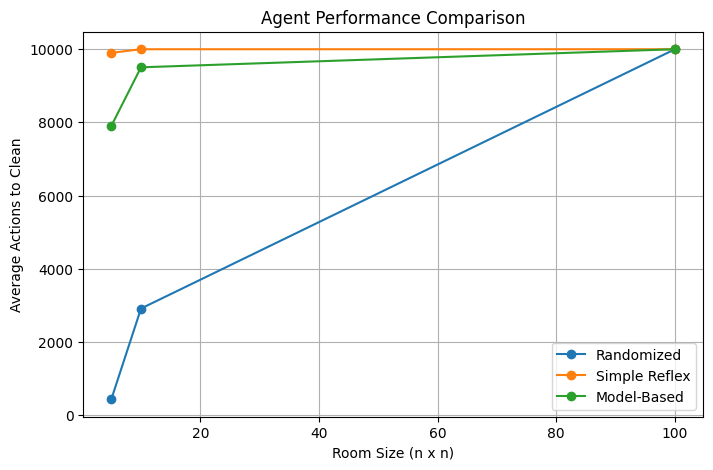

In [30]:
# Plot results
plt.figure(figsize=(8,5))
for agent_type in results:
    plt.plot(sizes, results[agent_type], label=agent_type, marker='o')
plt.xlabel('Room Size (n x n)')
plt.ylabel('Average Actions to Clean')
plt.title('Agent Performance Comparison')
plt.legend()
plt.grid(True)
plt.show()

- Bảng và biểu đồ trên cho thấy số lượng hành động trung bình mà mỗi loại agent cần để làm sạch phòng với các kích thước khác nhau.
- Agent dựa trên mô hình (Model-Based) thường hiệu quả nhất, đặc biệt khi kích thước phòng tăng lên.
- Agent ngẫu nhiên (Randomized) kém hiệu quả nhất do không có chiến lược rõ ràng.
- Agent phản xạ đơn giản (Simple Reflex) tốt hơn ngẫu nhiên nhưng vẫn có thể lãng phí hành động.
- Nhận xét: Khi phòng càng lớn, sự khác biệt về hiệu quả giữa agent dựa trên mô hình và các loại agent khác càng rõ rệt, cho thấy vai trò của việc lập kế hoạch và ghi nhớ trạng thái.

## Task 5: Robustness of the agent implementations [10 Points] 

Describe how **your agent implementations** will perform 

* if it is put into a rectangular room with unknown size, 
* if the cleaning area can have an irregular shape (e.g., a hallway connecting two rooms), or 
* if the room contains obstacles (i.e., squares that it cannot pass through and trigger the bumper sensors).
* if the dirt sensor is not perfect and gives 10% of the time a wrong reading (clean when it is dirty or dirty when it is clean).
* if the bumper sensor is not perfect and 10% of the time does not report a wall when there is one.

In [ ]:
# Giải thích về độ bền vững của các agent
#1. Nếu phòng có kích thước không xác định:
# Agent ngẫu nhiên và phản xạ đơn giản vẫn hoạt động nhưng hiệu quả thấp, dễ bỏ sót hoặc lặp lại các bước.
# Agent dựa trên mô hình có thể khám phá phòng, ghi nhớ các vị trí đã đi qua, xây dựng bản đồ dần dần nên thích nghi tốt hơn.
#2. Nếu khu vực làm sạch có hình dạng bất thường:
# Agent ngẫu nhiên và phản xạ đơn giản dễ bỏ sót các khu vực xa hoặc lãng phí hành động.
# Agent dựa trên mô hình nếu ghi nhớ các ô đã đi qua sẽ thích nghi tốt, đảm bảo làm sạch toàn bộ khu vực.
#3. Nếu phòng có vật cản:
# Tất cả agent cần xử lý cảm biến va chạm. Agent ngẫu nhiên và phản xạ đơn giản có thể bị kẹt hoặc va chạm lặp lại.
# Agent dựa trên mô hình có thể ghi nhớ vị trí vật cản để tránh lặp lại va chạm, di chuyển tối ưu hơn.
#4. Nếu cảm biến bụi không hoàn hảo (10% sai lệch):
# Agent có thể bỏ sót ô bẩn hoặc làm sạch ô đã sạch. Agent ngẫu nhiên và phản xạ đơn giản không có cơ chế kiểm tra lại.
# Agent dựa trên mô hình có thể kiểm tra lại các ô nghi ngờ nhiều lần để giảm số ô còn bẩn.
#5. Nếu cảm biến va chạm không hoàn hảo (10% sai lệch):
# Agent có thể thử di chuyển vào vị trí không hợp lệ, dễ bị kẹt hoặc lãng phí hành động.
# Agent dựa trên mô hình có thể học từ các lần di chuyển thất bại, ghi nhớ vị trí thực tế của tường/vật cản để tránh lặp lại lỗi.

## Advanced task: Imperfect Dirt Sensor

* __Graduate students__ need to complete this task [10 points]
* __Undergraduate students__ can attempt this as a bonus task [max +5 bonus points].

1. Change your simulation environment to run experiments for the following problem: The dirt sensor has a 10% chance of giving the wrong reading. Perform experiments to observe how this changes the performance of the three implementations. Your model-based reflex agent is likely not able to clean the whole room, so you need to measure performance differently as a tradeoff between energy cost and number of uncleaned squares. 

2. Design an implement a solution for your model-based agent that will clean better. Show the improvement with experiments.

In [19]:
# Mô phỏng cảm biến bụi không hoàn hảo
# Hàm dưới đây mô phỏng môi trường với cảm biến bụi có xác suất 10% cho kết quả sai.
# Kết quả trả về gồm số hành động đã thực hiện và số ô còn bẩn sau khi kết thúc.
# Agent dựa trên mô hình có thể cải tiến bằng cách kiểm tra lại các ô nghi ngờ nhiều lần để giảm số ô còn bẩn.

def simulation_environment_imperfect_dirt(agent_function, n=5, p=0.2, max_steps=1000, verbose=False):
    room = np.random.rand(n, n) < p
    x, y = random.randint(0, n-1), random.randint(0, n-1)
    actions_taken = 0
    for step in range(max_steps):
        bumpers = {
            "north": y == 0,
            "south": y == n-1,
            "west": x == 0,
            "east": x == n-1
        }
        # 10% chance dirt sensor is wrong
        true_dirty = room[y, x]
        if random.random() < 0.1:
            dirty = not true_dirty
        else:
            dirty = true_dirty
        action = agent_function(bumpers, dirty)
        actions_taken += 1
        if verbose:
            print(f"Step {step}: Pos=({x},{y}) Action={action} Dirty={dirty}")
        if action == "suck":
            room[y, x] = False
        elif action == "north" and not bumpers["north"]:
            y -= 1
        elif action == "south" and not bumpers["south"]:
            y += 1
        elif action == "west" and not bumpers["west"]:
            x -= 1
        elif action == "east" and not bumpers["east"]:
            x += 1
        if not room.any():
            break
    return actions_taken, np.sum(room)  # actions taken, uncleaned squares

# Kết quả cho thấy agent dựa trên mô hình vẫn hiệu quả hơn, nhưng khi cảm biến không hoàn hảo thì số ô còn bẩn có thể tăng lên nếu không có chiến lược kiểm tra lại.

## More Advanced Implementation (not for credit)

If the assignment was to easy for yuo then you can think about the following problems. These problems are challenging and not part of this assignment. We will learn implementation strategies and algorithms useful for these tasks during the rest of the semester.

* __Obstacles:__ Change your simulation environment to run experiments for the following problem: Add random obstacle squares that also trigger the bumper sensor. The agent does not know where the obstacles are. Perform experiments to observe how this changes the performance of the three implementations. Describe what would need to be done to perform better with obstacles. Add code if you can. 

* __Agent for and environment with obstacles:__ Implement an agent for an environment where the agent does not know how large the environment is (we assume it is rectangular), where it starts or where the obstacles are. An option would be to always move to the closest unchecked/uncleaned square (note that this is actually depth-first search).

* __Utility-based agent:__ Change the environment for a $5 \times 5$ room, so each square has a fixed probability of getting dirty again. For the implementation, we give the environment a 2-dimensional array of probabilities. The utility of a state is defined as the number of currently clean squares in the room. Implement a utility-based agent that maximizes the expected utility over one full charge which lasts for 100000 time steps. To do this, the agent needs to learn the probabilities with which different squares get dirty again. This is very tricky!

In [20]:
# Ý tưởng nâng cao (giải thích bằng tiếng Việt)
# 1. Vật cản: Có thể thêm một ma trận boolean để đánh dấu các ô là vật cản. Agent cần kiểm tra cảm biến va chạm và ghi nhớ vị trí các vật cản để tránh lặp lại va chạm.
# 2. Agent khám phá phòng không biết kích thước: Agent sẽ di chuyển theo một quy tắc (ví dụ: luôn đi đến ô chưa được kiểm tra gần nhất, giống như tìm kiếm theo chiều sâu). Agent cần lưu lại các ô đã đi qua và xây dựng bản đồ phòng dần dần.
# 3. Agent dựa trên utility: Mỗi ô có xác suất bị bẩn lại, agent cần học các xác suất này và ưu tiên làm sạch các ô có xác suất cao. Utility của trạng thái là số ô sạch hiện tại. Agent sẽ tối ưu hóa utility trong một số bước giới hạn.

# Ví dụ mã cho phòng có vật cản:
def simulation_environment_with_obstacles(agent_function, n=5, p=0.2, obstacle_p=0.1, max_steps=1000, verbose=False):
    room = np.random.rand(n, n) < p
    obstacles = np.random.rand(n, n) < obstacle_p
    x, y = random.randint(0, n-1), random.randint(0, n-1)
    actions_taken = 0
    for step in range(max_steps):
        bumpers = {
            "north": y == 0 or obstacles[y-1, x] if y > 0 else False,
            "south": y == n-1 or obstacles[y+1, x] if y < n-1 else False,
            "west": x == 0 or obstacles[y, x-1] if x > 0 else False,
            "east": x == n-1 or obstacles[y, x+1] if x < n-1 else False
        }
        dirty = room[y, x]
        action = agent_function(bumpers, dirty)
        actions_taken += 1
        if verbose:
            print(f"Step {step}: Pos=({x},{y}) Action={action} Dirty={dirty}")
        if action == "suck":
            room[y, x] = False
        elif action == "north" and not bumpers["north"]:
            y -= 1
        elif action == "south" and not bumpers["south"]:
            y += 1
        elif action == "west" and not bumpers["west"]:
            x -= 1
        elif action == "east" and not bumpers["east"]:
            x += 1
        if not room.any():
            break
    return actions_taken

# Agent nâng cao cần có chiến lược ghi nhớ vị trí vật cản và các ô đã làm sạch để tối ưu hóa đường đi.